In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
dataset = pd.read_csv('dataset_bascula.csv')

In [38]:
data = dataset.drop(columns=['Mes', 'fecha', 'Grupo', 'Hora', 'Brix jugo', 'Pureza jugo', '% AR jugo', 'Glucobrix',
                      'Acidez', '% Jugo', 'Brix caña', 'Pol caña', 'Pza. caña', 'Calidad Caña', 'Humedad caña',
                      'ENVIO'])

In [39]:
data.head()

,Semana,Estrato,Pol jugo,Rdto. Pol Bascula,% Fibra caña,Variedad
0,1,BAJO,13.76,114.45,13.15,CP 731547
1,1,BAJO,13.87,110.94,14.39,CP 731547
2,1,BAJO,13.63,116.06,12.38,CP 731547
3,1,BAJO,14.72,122.48,13.14,CP 731547
4,1,BAJO,15.38,128.44,13.02,CP 731547


In [40]:
data.Estrato.isna().sum()

200

In [41]:
data = data.dropna()

In [42]:
data.describe()

,Semana,Pol jugo,Rdto. Pol Bascula,% Fibra caña
count,23830.000000,23830.000000,23830.000000,23830.000000
mean,13.103861,14.158395,118.240634,13.344172
std,7.017750,1.647671,14.015970,1.269979
min,1.000000,4.520000,21.870000,9.650000
25%,7.000000,13.080000,109.130000,12.460000
50%,13.000000,14.180000,118.450000,13.210000
75%,19.000000,15.250000,127.620000,14.087500
max,25.000000,22.570000,174.370000,30.260000


In [43]:
data.count()

Semana               23830
Estrato              23830
Pol jugo             23830
Rdto. Pol Bascula    23830
% Fibra caña         23830
Variedad             23830
dtype: int64

In [45]:
data.dtypes

Semana                 int64
Estrato               object
Pol jugo             float64
Rdto. Pol Bascula    float64
% Fibra caña         float64
Variedad              object
dtype: object

In [46]:
data.columns

Index(['Semana', 'Estrato', 'Pol jugo', 'Rdto. Pol Bascula', '% Fibra caña',
       'Variedad'],
      dtype='object')

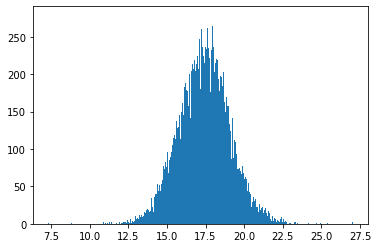

In [9]:
plt.hist(dataset['Brix jugo'], bins=500)
plt.show()

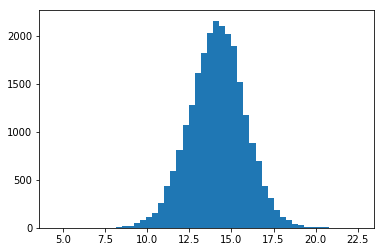

In [8]:
plt.hist(dataset['Pol jugo'], bins=50)
plt.show()

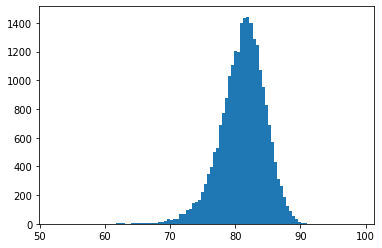

In [10]:
plt.hist(dataset['Pureza jugo'], bins=100)
plt.show()

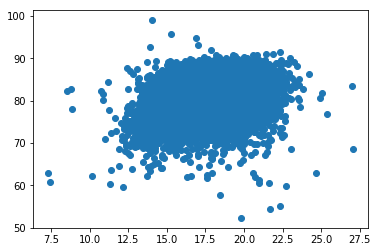

In [3]:
plt.scatter(dataset['Brix jugo'], dataset['Pureza jugo'])

In [11]:
sns.pairplot(
    data=dataset[['Brix jugo', 'Pol jugo','Pureza jugo', 'Estrato', 'Variedad', 'Acidez', 'Glucobrix']],
    hue="Estrato",
    palette="tab10")

NameError: name 'sns' is not defined